<a href="https://colab.research.google.com/github/AntoniXGaudi/CW_Workshop/blob/main/Autoscout_local_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from scipy import stats
from scipy.stats.mstats import winsorize

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_rows', 700)  # |
pd.set_option('display.max_columns', None)   # |

In [ ]:
import os
print(os.getcwd())  # | how to know where the csv was saved

C:\Users\wolfg


In [ ]:
file_path = 'C:/Users/wolfg/cleaned_autoscout_part_2.csv'
# Read the csv file into a pandas DataFrame
df = pd.read_csv(file_path)

# Now you can use df in your new notebook

In [ ]:
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR

    print("Lower Limit:",lower_lim)
    print("Upper limit:", upper_lim)

In [ ]:
# Counting of Outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR

    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()

In [ ]:
# Dropping of Outliers
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR

    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]

In [ ]:
#Explore different quantiles at the upper end
def winsorize_percentage_selection(df,column):
    print('90% quantile:   ', df[column].quantile(0.90))
    print('92.5% quantile: ', df[column].quantile(0.925))
    print('95% quantile:   ', df[column].quantile(0.95))
    print('97.5% quantile: ', df[column].quantile(0.975))
    print('99% quantile:   ', df[column].quantile(0.99))
    print('99.9% quantile: ', df[column].quantile(0.999))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23300 entries, 0 to 23299
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0.1                   23300 non-null  int64  
 1   Unnamed: 0                     23300 non-null  int64  
 2   make_model                     23300 non-null  object 
 3   make                           23300 non-null  object 
 4   location                       23300 non-null  object 
 5   price                          23300 non-null  float64
 6   body_type                      23300 non-null  object 
 7   type                           23300 non-null  object 
 8   doors                          23300 non-null  float64
 9   warranty                       23300 non-null  object 
 10  mileage                        23300 non-null  float64
 11  gearbox                        23300 non-null  object 
 12  fuel_type                      23300 non-null 

In [ ]:
df.shape

(23300, 31)

In [ ]:


df.describe(exclude= "object").T



,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,23300.000,12315.905,7006.994,0.000,6308.750,12338.500,18377.250,24578.000
Unnamed: 0,23300.000,13687.391,8273.946,1.000,6451.750,13376.500,20768.250,29478.000
price,23300.000,23387.707,22935.363,490.000,11890.000,18490.000,27990.000,999999.000
doors,23300.000,4.126,1.208,1.000,3.000,5.000,5.000,6.000
mileage,23300.000,71767.821,67586.174,0.000,19981.750,55443.500,105803.500,1440000.000
seats,23300.000,4.702,0.814,0.000,4.000,5.000,5.000,17.000
power_(kw),23300.000,119.921,69.445,1.000,80.000,100.000,135.000,924.000
engine_size,23300.000,1757.582,1090.288,0.000,1300.000,1598.000,1987.000,99900.000
gears,23300.000,5.982,1.469,0.000,5.000,6.000,6.000,10.000
cylinders,23300.000,4.058,1.019,0.000,4.000,4.000,4.000,16.000


price (§price)

In [ ]:

df.price.describe()



count    23300.000
mean     23387.707
std      22935.363
min        490.000
25%      11890.000
50%      18490.000
75%      27990.000
max     999999.000
Name: price, dtype: float64

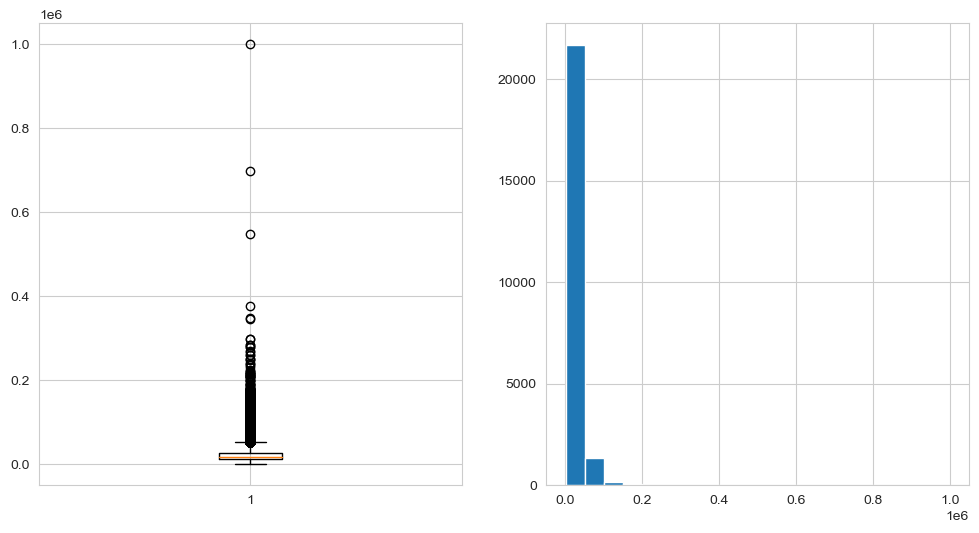

In [ ]:


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);



In [ ]:
df.price.sort_values(ascending=True).head(10)

21539   490.000
22446   500.000
22720   500.000
22578   590.000
22297   600.000
22167   600.000
21808   699.000
22225   700.000
22056   740.000
22629   750.000
Name: price, dtype: float64

In [ ]:
df.price.sort_values(ascending=True).tail(10)

1891    283900.000
998     284780.000
3316    299000.000
3253    299000.000
2406    344900.000
23015   349000.000
4217    375900.000
21209   549000.000
28      696900.000
22865   999999.000
Name: price, dtype: float64

In [ ]:


limits(df,"price")



Lower Limit: -12260.0
Upper limit: 52140.0


In [ ]:


outliers(df,"price")



1513

In [ ]:


winsorize_percentage_selection(df,"price")



90% quantile:    42781.00000000002
92.5% quantile:  48900.0
95% quantile:    57490.0
97.5% quantile:  73524.12499999985
99% quantile:    109890.09999999998
99.9% quantile:  223872.88500000315


In [ ]:
df.price= winsorize(df["price"],(0, 0.01),inplace=True)

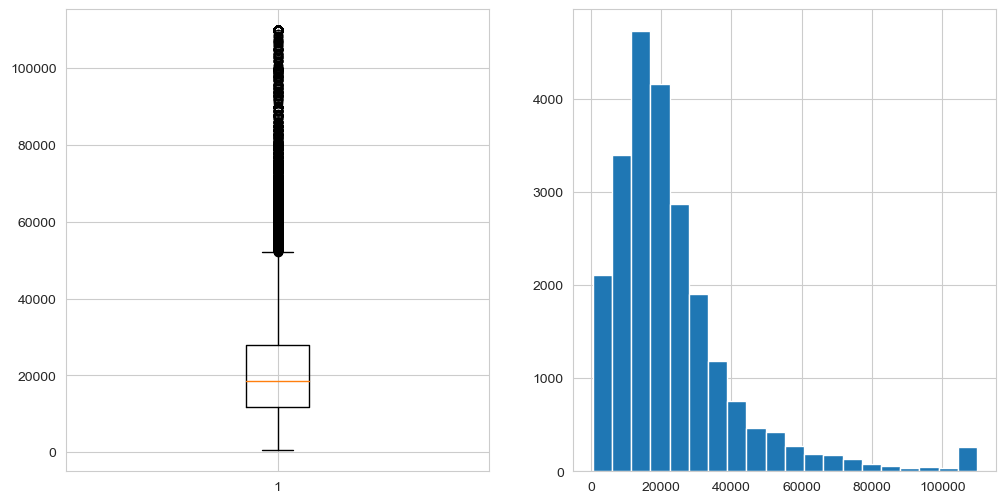

In [ ]:


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);



In [ ]:


df.price.describe()



count    23300.000
mean     22810.680
std      17946.376
min        490.000
25%      11890.000
50%      18490.000
75%      27990.000
max     109890.000
Name: price, dtype: float64

make_model (§.make_model)

In [ ]:
df.make_model.nunique()


569

In [ ]:
df.make_model.value_counts()

Renault Megane              820
SEAT Leon                   734
Opel Astra                  649
Hyundai i30                 552
Ford Mustang                545
Peugeot 308                 490
Ford Focus                  480
Dacia Sandero               478
SEAT Ibiza                  420
Nissan Qashqai              400
Fiat 500                    393
Ford Fiesta                 392
Renault Clio                354
Skoda Octavia               338
Volvo C70                   338
Opel Corsa                  331
Fiat Tipo                   310
Nissan Micra                307
Fiat 500X                   306
Dacia Duster                302
Opel Insignia               287
Toyota Yaris                279
Peugeot 208                 237
Volvo V40                   227
Skoda Fabia                 224
Ford Kuga                   209
Hyundai TUCSON              203
Peugeot 3008                202
Peugeot RCZ                 193
Skoda Superb                186
Peugeot 508                 182
Skoda Sc

location (§location)

In [ ]:
df.location.value_counts()

DE    11418
ES     3889
NL     2459
IT     2102
BE     1634
FR     1212
AT      552
LU       31
BG        1
EE        1
DK        1
Name: location, dtype: int64

In [ ]:
# Define the locations you are interested in
locations_of_interest = ['EE', 'BG', 'DK']

# Filter the DataFrame
df_filtered = df[df['location'].isin(locations_of_interest)]

# Display the filtered DataFrame
print(df_filtered)


       Unnamed: 0.1  Unnamed: 0    make_model     make location     price  \
10996         11658       22534  Ford Mustang     Ford       BG 25500.000   
22760         23847       17658  Toyota Supra   Toyota       EE 29500.000   
22981         24090        7751   Peugeot 205  Peugeot       DK 18500.000   

           body_type    type  doors warranty    mileage    gearbox fuel_type  \
10996         Coupe    Used   2.000       No  79333.000  Automatic   Benzine   
22760         Coupe    Used   2.000       No 147744.000  Automatic   Benzine   
22981   Convertible    Used   2.000       No 199500.000     Manual   Benzine   

               seller  seats  power_(kw)  engine_size  gears drivetrain  \
10996  Private seller  4.000     213.000     2261.000 10.000      Rear    
22760  Private seller  4.000     165.000     2954.000  5.000      Rear    
22981  Private seller  4.000     108.000     1905.000  5.000     Front    

       cylinders                                             extras  

In [ ]:
# 2 out of 3 very old, possibly delete them

body_type (§body_type)

In [ ]:
df.body_type.value_counts()

 Off-Road/Pick-up     4578
 Station wagon        4464
 Sedan                4253
 Compact              3999
 Coupe                3339
 Convertible          2667
Name: body_type, dtype: int64

type (§type)

In [ ]:
df.type.value_counts()

 Used               20437
 Demonstration       1198
 Pre-registered      1157
 Employee's car       508
Name: type, dtype: int64

doors (§doors)

In [ ]:


df.doors.describe()



count   23300.000
mean        4.126
std         1.208
min         1.000
25%         3.000
50%         5.000
75%         5.000
max         6.000
Name: doors, dtype: float64

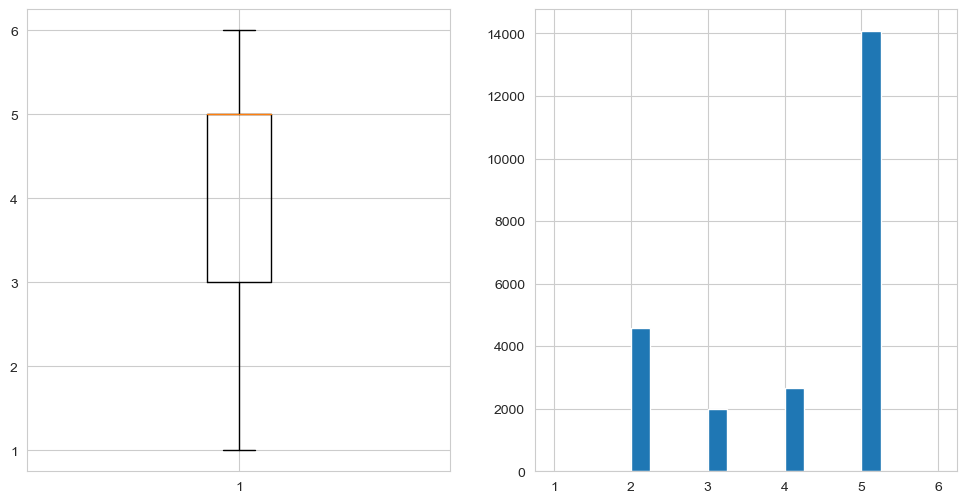

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.doors)

plt.subplot(122)
plt.hist(df.doors,bins=20);

In [ ]:
limits(df,"doors")

Lower Limit: 0.0
Upper limit: 8.0


In [ ]:
outliers(df,"doors")

0

In [ ]:


(df.doors >5).sum()



5

In [ ]:
df_filtered = df[df['doors'] > 5]

print(df_filtered)


       Unnamed: 0.1  Unnamed: 0    make_model   make location     price  \
136             161       16404  Dacia Dokker  Dacia       BE 16900.000   
18216         19143       16464   Dacia Logan  Dacia       BE  5950.000   
19610         20579       16429   Dacia Logan  Dacia       BE  3000.000   
19703         20677       16220   Dacia Logan  Dacia       BE  2700.000   
20329         21320       16395   Dacia Logan  Dacia       BE  1700.000   

             body_type    type  doors warranty    mileage gearbox  \
136     Station wagon    Used   6.000      Yes     90.000  Manual   
18216   Station wagon    Used   6.000       No 173000.000  Manual   
19610   Station wagon    Used   6.000       No 258000.000  Manual   
19703   Station wagon    Used   6.000       No 210877.000  Manual   
20329   Station wagon    Used   6.000       No 144043.000  Manual   

                fuel_type          seller  seats  power_(kw)  engine_size  \
136    Liquid/Natural Gas          Dealer  5.000      80.

In [ ]:
# no outliers, nothing to drop

warranty (§warranty)

In [ ]:
df.warranty.value_counts()

No     13338
Yes     9962
Name: warranty, dtype: int64

mileage (§mileage)

In [ ]:
df.mileage.describe()

count     23300.000
mean      71767.821
std       67586.174
min           0.000
25%       19981.750
50%       55443.500
75%      105803.500
max     1440000.000
Name: mileage, dtype: float64

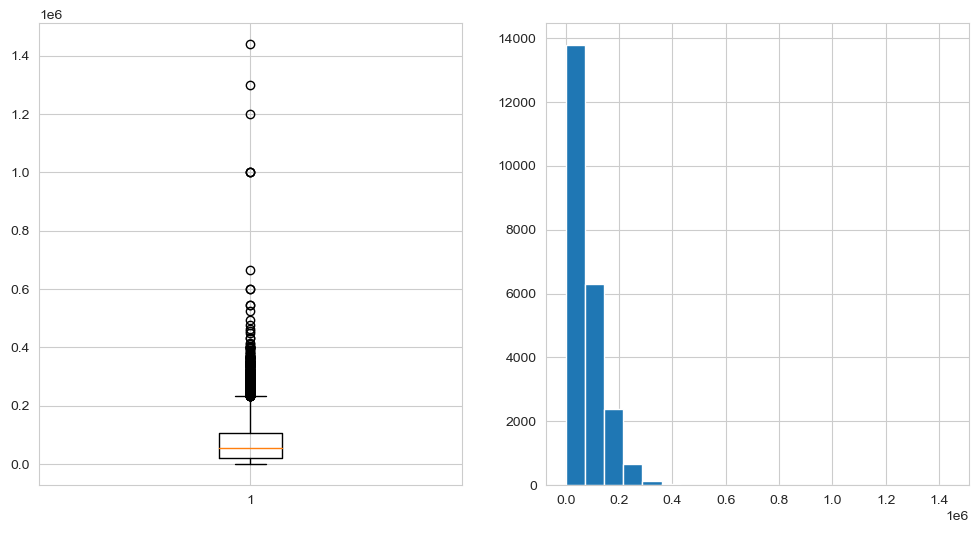

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.mileage)

plt.subplot(122)
plt.hist(df.mileage,bins=20);

In [ ]:


limits(df,"mileage")



Lower Limit: -108750.875
Upper limit: 234536.125


In [ ]:
outliers(df,"mileage")

564

In [ ]:
(df.mileage < 0).sum()

0

In [ ]:


winsorize_percentage_selection(df,"mileage")



90% quantile:    162210.00000000023
92.5% quantile:  179000.0
95% quantile:    199000.0
97.5% quantile:  233000.0
99% quantile:    273185.74999999953
99.9% quantile:  401501.26800000155


In [ ]:
df_filtered = df.loc[(df['mileage'] >= 300000) & (df['age'] <= 5), ['mileage', 'age']] #

print(df_filtered)


          mileage   age
8637  1440000.000 3.000
11673 1199900.000 4.000
12277 1000001.000 4.000
13402  415000.000 5.000
13805  335000.000 5.000


In [ ]:
# df = df[~((df['mileage'] >= 300000) & (df['age'] <= 5))][['mileage', 'age']]
  #  mileage > 1000.000, age 3, 4 years, something is wrong, delete them
df = df[~((df['mileage'] >= 300000) & (df['age'] <= 5))]
df

,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,0,7058,Renault Clio,Renault,FR,16990.000,Sedan,Used,5.000,No,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,67.000,999.000,5.000,Front,4.000,Alloy wheels,1157.000,0.000,Euro 6,Cloth,1.000,3.300,1.000,Premium,Premium Media,Safety Standard Package
1,1,9856,Fiat 500 Abarth,Fiat,NL,17995.000,Compact,Used,3.000,No,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,Front,4.000,"Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,3.000,6.000,2.000,Standard,Standard Media,Safety Standard Package
2,2,19680,Nissan Micra,Nissan,NL,3250.000,Convertible,Used,2.000,No,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,Front,4.000,"Alloy wheels (15"")",1125.000,0.000,Euro 6,Part/Full Leather,3.000,6.600,2.000,Standard,Standard Media,Safety Standard Package
3,3,6295,Renault Captur,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,Front,3.000,Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard,Standard Media,Safety Premium Package
4,4,11885,Fiat Panda,Fiat,IT,18690.000,Sedan,Pre-registered,5.000,Yes,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,4WD,2.000,"Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Premium Media,Safety Standard Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23295,24573,21779,Ford M,Ford,BE,20000.000,Convertible,Used,4.000,No,65515.000,Manual,Benzine,Dealer,5.000,21.000,2043.000,6.000,Front,4.000,Summer tyres,1320.000,0.000,Euro 6,Part/Full Leather,93.000,4.900,3.000,Standard,Standard Media,Safety Standard Package
23296,24575,22664,Ford Bronco,Ford,DE,57480.000,Off-Road/Pick-up,Used,5.000,No,10.000,Automatic,Benzine,Dealer,5.000,180.000,2000.000,8.000,4WD,4.000,"Touch screen, Trailer hitch, Voice Control",2146.000,0.000,Euro 6,Part/Full Leather,122.000,8.300,1.000,Standard,Premium Media,Safety Standard Package
23297,24576,25488,Hyundai IONIQ,Hyundai,DE,26991.000,Sedan,Used,5.000,No,29961.000,Automatic,Benzine,Dealer,5.000,103.000,1580.000,6.000,Front,4.000,"Alloy wheels, Shift paddles, Touch screen",1626.000,1.000,Euro 6,Cloth,122.000,1.100,1.000,Premium,Premium Media,Safety Premium Package
23298,24577,683,Mercedes-Benz E 53 AMG,Mercedes-Benz,BE,108900.000,Convertible,Demonstration,2.000,Yes,3856.000,Automatic,Benzine,Dealer,4.000,320.000,2999.000,8.000,4WD,6.000,"Alloy wheels, Ambient lighting, Automatically ...",1980.000,0.000,Euro 6,Part/Full Leather,0.000,8.800,1.000,Standard,Premium Media,Safety Premium Plus Package


In [ ]:
rows = df.iloc[[8637, 11673,12277]]
print(rows)


       Unnamed: 0.1  Unnamed: 0     make_model    make location     price  \
8638           9223       14989  Skoda Octavia   Skoda       DE 22990.000   
11675         12364       17378   Toyota Yaris  Toyota       NL 16550.000   
12280         12988        4797      Opel Karl    Opel       DE 10550.000   

             body_type    type  doors warranty   mileage    gearbox fuel_type  \
8638    Station wagon    Used   4.000       No 58961.000  Automatic    Diesel   
11675         Compact    Used   5.000      Yes 28545.000  Automatic   Benzine   
12280           Sedan    Used   5.000      Yes  5700.000     Manual   Benzine   

       seller  seats  power_(kw)  engine_size  gears drivetrain  cylinders  \
8638   Dealer  5.000     110.000     1968.000  7.000     Front       4.000   
11675  Dealer  5.000      54.000     1497.000  5.000     Front       4.000   
12280  Dealer  4.000      55.000      999.000  5.000     Front       3.000   

                                                  ext

In [ ]:
# 3 outliers are gone

gears (§gears)

In [ ]:
df.gears.describe()

count   23295.000
mean        5.982
std         1.470
min         0.000
25%         5.000
50%         6.000
75%         6.000
max        10.000
Name: gears, dtype: float64

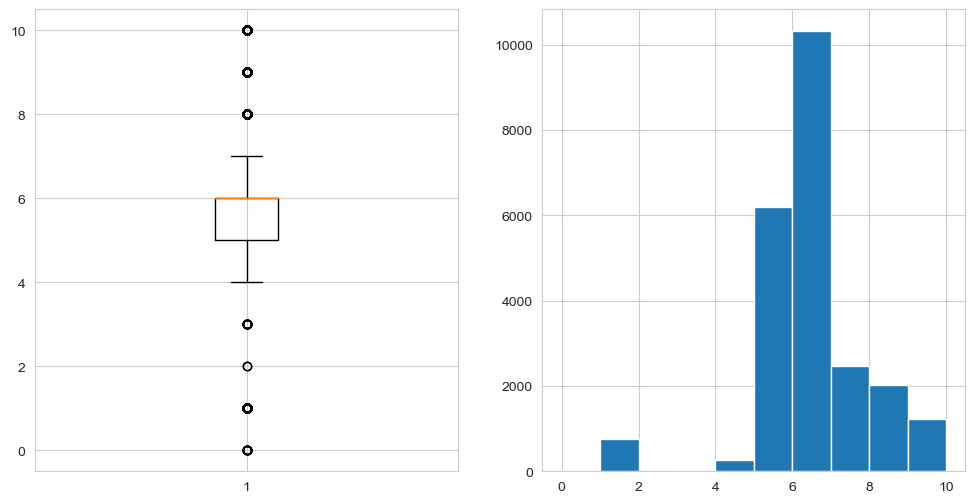

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.gears)

plt.subplot(122)
plt.hist(df.gears,bins=10);

In [ ]:


limits(df,"gears")



Lower Limit: 3.5
Upper limit: 7.5


In [ ]:
outliers(df,"gears")

4065

In [ ]:
df[df['gears'] > 8]["make_model"]

6        Mercedes-Benz SL 63 AMG
11                 Mercedes-Benz
13         Mercedes-Benz GLE 400
18           Mercedes-Benz C 300
19                  Ford Mustang
                  ...           
23222               Ford Mustang
23225               Ford Mustang
23226               Ford Mustang
23228               Ford Mustang
23237               Ford Mustang
Name: make_model, Length: 1227, dtype: object

In [ ]:
num_unique_models = df[df['gears'] > 8]['make_model'].nunique()
print(num_unique_models)


83


In [ ]:
model_counts = df[df['gears'] > 8]['make_model'].value_counts()
print(model_counts)


Ford Mustang                155
Mercedes-Benz C 200          66
Mercedes-Benz C 220          58
Mercedes-Benz C 300          56
Mercedes-Benz E 220          54
Mercedes-Benz E 300          42
Mercedes-Benz C 43 AMG       39
Mercedes-Benz E 400          37
Mercedes-Benz AMG GT         37
Mercedes-Benz C 63 AMG       33
Mercedes-Benz GLC 220        32
Mercedes-Benz C 400          28
Mercedes-Benz C 180          28
Mercedes-Benz E 200          27
Opel Insignia                25
Mercedes-Benz E 53 AMG       25
Mercedes-Benz GLC 300        23
Mercedes-Benz GLC 63 AMG     23
Mercedes-Benz GLC 43 AMG     21
Mercedes-Benz GLC 250        21
Mercedes-Benz E 350          21
Mercedes-Benz E 63 AMG       20
Mercedes-Benz GLE 400        18
Mercedes-Benz S 580          15
Mercedes-Benz G 63 AMG       14
Mercedes-Benz GLE 350        14
Mercedes-Benz                13
Mercedes-Benz CLS 400        13
Mercedes-Benz S 350          13
Mercedes-Benz CLS 350        13
Fiat 500X                    13
Ford Exp

In [ ]:
# Ford Mustang can have 10 gears, Mercedes Benz as well, nothing to delete

gearbox (§gearbox)

In [ ]:
df.gearbox.describe()

count      23295
unique         3
top       Manual
freq       14189
Name: gearbox, dtype: object

fuel_type (§fuel_type)

In [ ]:
df.fuel_type.value_counts(dropna=False)

Benzine               15874
Diesel                 7001
Liquid/Natural Gas      345
Electric                 75
Name: fuel_type, dtype: int64

seller (§seller)

In [ ]:
df.seller.value_counts(dropna=False)

Dealer            21321
Private seller     1974
Name: seller, dtype: int64

seats (§seats)

In [ ]:
df.seats.describe()

count   23295.000
mean        4.702
std         0.814
min         0.000
25%         4.000
50%         5.000
75%         5.000
max        17.000
Name: seats, dtype: float64

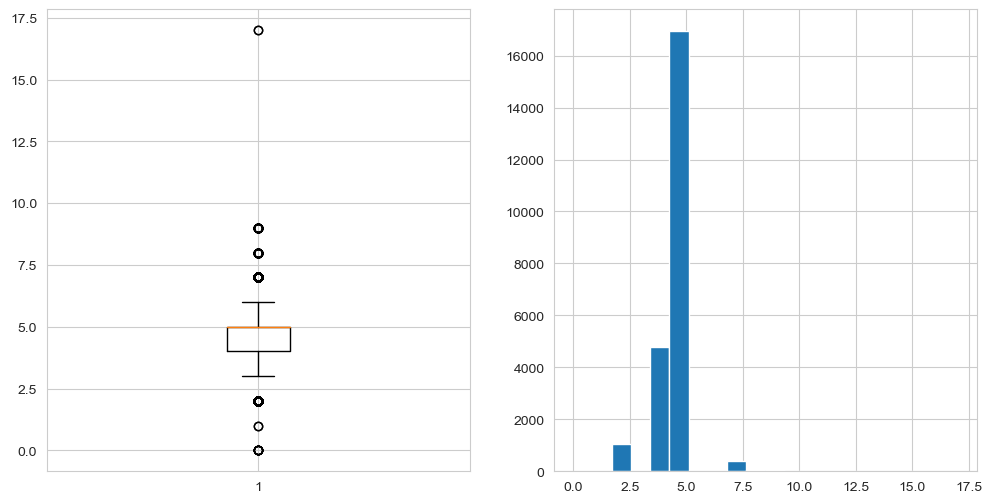

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.seats)

plt.subplot(122)
plt.hist(df.seats,bins=20);

In [ ]:


limits(df,"seats")



Lower Limit: 2.5
Upper limit: 6.5


In [ ]:
outliers(df,"seats")

1548

In [ ]:
model_counts = df[df['seats'] > 6][['make_model', 'seats']].value_counts()  # |[['make_model', 'seats']] double brackets, since list inside
print(model_counts)


make_model                seats 
Volvo XC90                7.000     66
Peugeot 5008              7.000     60
Dacia Lodgy               7.000     39
Skoda Kodiaq              7.000     24
Dacia Jogger              7.000     21
SEAT Tarraco              7.000     17
Nissan X-Trail            7.000     14
Toyota Land Cruiser       7.000     13
Ford Explorer             7.000     11
Ford Tourneo Custom       8.000     11
Fiat Freemont             7.000      9
SEAT Alhambra             7.000      9
Mercedes-Benz GLS 400     7.000      9
Ford S-Max                7.000      8
Nissan Qashqai+2          7.000      8
Nissan Pathfinder         7.000      8
Hyundai SANTA FE          7.000      7
Nissan NV200              7.000      7
Ford Tourneo Custom       9.000      7
Nissan NV300              9.000      6
Toyota Land Cruiser       8.000      6
Toyota Highlander         7.000      6
Nissan Primastar          9.000      6
Mercedes-Benz GLS 350     7.000      5
Dacia Logan               7.000

In [ ]:
# Opel Movano is a van with 3 seats

In [ ]:
# Condition for rows where make_model is 'Opel Movano'
condition = (df['make_model'] == 'Opel Movano')

# Set the new value for 'seats' where the condition is True
df.loc[condition, 'seats'] = 3


In [ ]:
df[df['make_model'] == 'Opel Movano']

,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
2353,2590,4309,Opel Movano,Opel,DE,59990.000,Station wagon,Used,5.000,No,290.000,Manual,Diesel,Dealer,3.000,120.000,2299.000,6.000,Rear,4.000,Sliding door,1320.000,1.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Standard Media,Safety Standard Package
2389,2629,4314,Opel Movano,Opel,DE,59990.000,Station wagon,Used,5.000,No,300.000,Manual,Diesel,Dealer,3.000,120.000,2299.000,6.000,Rear,4.000,Sliding door,1320.000,1.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Standard Media,Safety Standard Package


power_(kw) (§power_(kw))

In [ ]:


df["power_(kw)"].describe()



count   23295.000
mean      119.928
std        69.450
min         1.000
25%        80.000
50%       100.000
75%       135.000
max       924.000
Name: power_(kw), dtype: float64

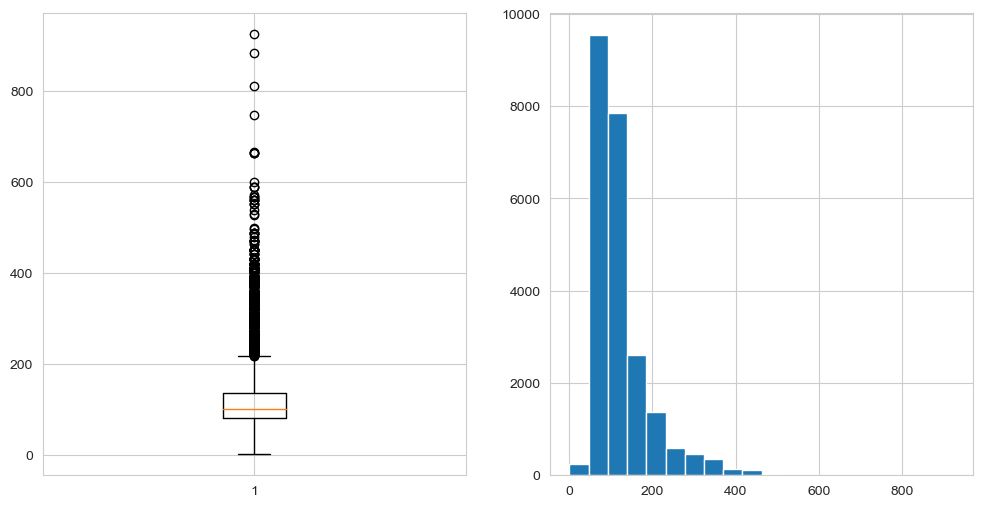

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df["power_(kw)"])

plt.subplot(122)
plt.hist(df["power_(kw)"],bins=20);

In [ ]:


limits(df,"power_(kw)")



Lower Limit: -2.5
Upper limit: 217.5


In [ ]:


outliers(df,"power_(kw)")



2185

In [ ]:


(df["power_(kw)"] <30).sum()



33

In [ ]:
df[df["power_(kw)"] <30][["make_model","power_(kw)"]].value_counts()

make_model       power_(kw)
Fiat 126         18.000        3
Fiat 500         13.000        2
Renault R 4      25.000        2
Fiat 500L        13.000        2
Fiat Seicento    29.000        2
Dacia Spring     18.000        1
Ford Kuga        3.000         1
SEAT Leon        29.000        1
                 17.000        1
Renault Megane   15.000        1
                 7.000         1
Peugeot          17.000        1
Opel Kadett      1.000         1
Hyundai i20      6.000         1
Ford M           21.000        1
Fiat 850         26.000        1
Fiat Uno         20.000        1
Fiat 126         17.000        1
Fiat 600         23.000        1
                 18.000        1
Fiat 500 Abarth  18.000        1
Fiat 500         27.000        1
                 19.000        1
                 16.000        1
                 14.000        1
Fiat 130         22.000        1
SEAT Marbella    25.000        1
dtype: int64

In [ ]:
# Ford Kuga, Hyundai i20 and Opel Kadett definitely wrong, delete anything < 10 Kw

In [ ]:
df.shape

(23295, 31)

In [ ]:
df = df[df['power_(kw)'] >= 10]


In [ ]:
df.shape

(23291, 31)

engine size (§engine_size)

In [ ]:
df.engine_size.describe()

count   23291.000
mean     1757.639
std      1090.442
min         0.000
25%      1300.000
50%      1598.000
75%      1987.000
max     99900.000
Name: engine_size, dtype: float64

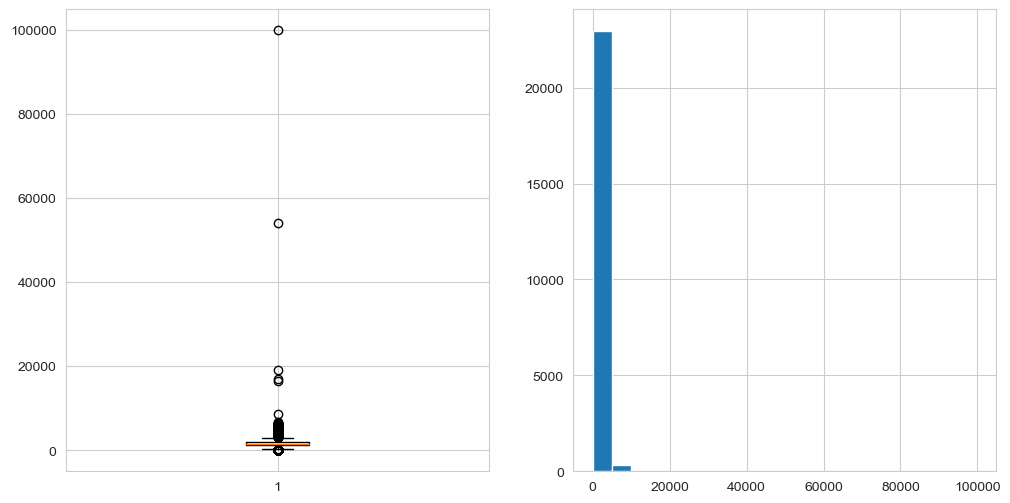

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.engine_size)

plt.subplot(122)
plt.hist(df.engine_size,bins=20);

In [ ]:


limits(df,"engine_size")



Lower Limit: 269.5
Upper limit: 3017.5


In [ ]:


outliers(df,"engine_size")



1399

In [ ]:
# Gruppieren nach 'make_model' und berechnen des Durchschnitts der 'engine_size' für jede Gruppe
grouped_df = df.groupby('make_model', as_index=False)['engine_size'].mean()

# Behalten Sie nur die Zeilen, in denen der Durchschnitt der 'engine_size' größer als 3000 ist
df_filtered = grouped_df[grouped_df['engine_size'] > 3000].sort_values("engine_size")

df_filtered

,make_model,engine_size
274,Mercedes-Benz S 400,3014.375
273,Mercedes-Benz S 350,3016.222
202,Mercedes-Benz E 350,3016.675
203,Mercedes-Benz E 400,3050.273
384,Opel Monterey,3059.000
178,Mercedes-Benz CLK 320,3093.000
258,Mercedes-Benz GLK 350,3157.333
201,Mercedes-Benz E 320,3199.000
132,Mercedes-Benz 320,3199.000
12,Fiat 130,3221.333


In [ ]:
df = df.drop(12, axis=0)  # | Fiat 130 has wrong engine size, drop it


In [ ]:
df.head(14)

,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,0,7058,Renault Clio,Renault,FR,16990.000,Sedan,Used,5.000,No,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,67.000,999.000,5.000,Front,4.000,Alloy wheels,1157.000,0.000,Euro 6,Cloth,1.000,3.300,1.000,Premium,Premium Media,Safety Standard Package
1,1,9856,Fiat 500 Abarth,Fiat,NL,17995.000,Compact,Used,3.000,No,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,Front,4.000,"Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,3.000,6.000,2.000,Standard,Standard Media,Safety Standard Package
2,2,19680,Nissan Micra,Nissan,NL,3250.000,Convertible,Used,2.000,No,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,Front,4.000,"Alloy wheels (15"")",1125.000,0.000,Euro 6,Part/Full Leather,3.000,6.600,2.000,Standard,Standard Media,Safety Standard Package
3,3,6295,Renault Captur,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,Front,3.000,Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard,Standard Media,Safety Premium Package
4,4,11885,Fiat Panda,Fiat,IT,18690.000,Sedan,Pre-registered,5.000,Yes,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,4WD,2.000,"Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Premium Media,Safety Standard Package
5,5,16042,Dacia Duster,Dacia,DE,21989.000,Off-Road/Pick-up,Pre-registered,5.000,No,10.000,Manual,Benzine,Dealer,5.000,96.000,1332.000,6.000,Front,4.000,"Alloy wheels, Cargo barrier, Roof rack, Smoker...",1320.000,1.000,Euro 6,Cloth,0.000,5.700,1.000,Standard,Premium Media,Safety Standard Package
6,6,789,Mercedes-Benz SL 63 AMG,Mercedes-Benz,DE,109890.000,Convertible,Used,2.000,No,10.000,Automatic,Benzine,Private seller,4.000,430.000,3982.000,9.000,4WD,8.000,"Alloy wheels (21""), Ambient lighting, Automati...",1970.000,1.000,Euro 6,Part/Full Leather,0.000,12.900,1.000,Premium,Premium Media,Safety Premium Plus Package
7,7,16028,Dacia Duster,Dacia,DE,22678.000,Off-Road/Pick-up,Pre-registered,5.000,No,13.000,Manual,Benzine,Dealer,5.000,96.000,1332.000,6.000,Front,4.000,"Alloy wheels, Cargo barrier, Roof rack, Smoker...",1320.000,1.000,Euro 6,Cloth,0.000,5.700,1.000,Standard,Premium Media,Safety Standard Package
8,8,16794,Dacia Sandero,Dacia,IT,14850.000,Sedan,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,998.000,5.000,Front,3.000,"Steel wheels, Touch screen",1181.000,0.000,Euro 6,Cloth,0.000,5.600,1.000,Standard,Premium Media,Safety Premium Plus Package
9,11,6287,Renault Captur,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,Front,3.000,Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard,Standard Media,Safety Premium Package


drivetrain (§drivetrain)

In [ ]:
df["drivetrain"].value_counts(dropna=False)

 Front     17515
 4WD        3429
 Rear       2346
Name: drivetrain, dtype: int64

In [ ]:
# ok

cylinders (§cylinders)

In [ ]:
df.cylinders.describe()


count   23290.000
mean        4.059
std         1.019
min         0.000
25%         4.000
50%         4.000
75%         4.000
max        16.000
Name: cylinders, dtype: float64

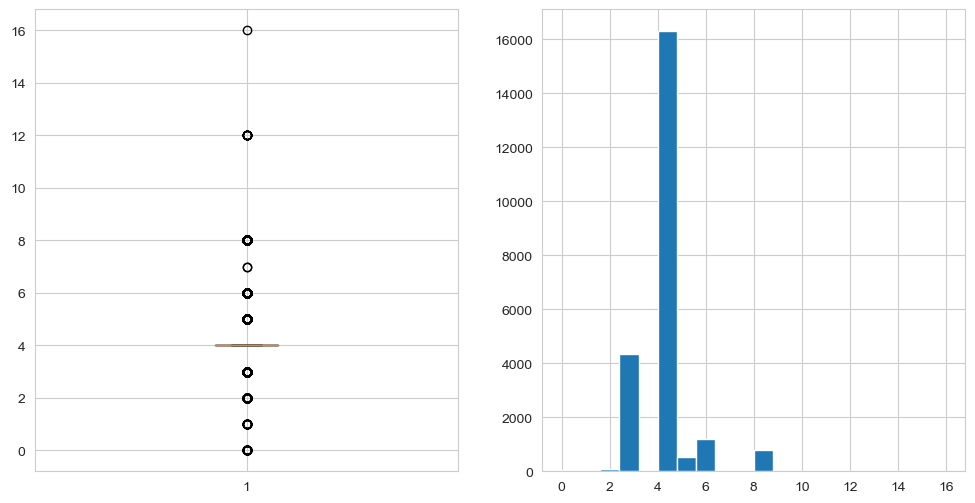

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.cylinders)

plt.subplot(122)
plt.hist(df.cylinders,bins=20);

In [ ]:
limits(df,"cylinders")

Lower Limit: 4.0
Upper limit: 4.0


In [ ]:




winsorize_percentage_selection(df,"price")





90% quantile:    42781.00000000002
92.5% quantile:  48900.0
95% quantile:    57490.0
97.5% quantile:  73540.37499999985
99% quantile:    109890.0
99.9% quantile:  109890.0


In [ ]:
df.cylinders.value_counts(dropna=False)

4.000     16303
3.000      4327
6.000      1185
8.000       784
5.000       513
2.000        99
0.000        41
1.000        24
12.000       11
7.000         2
16.000        1
Name: cylinders, dtype: int64

In [ ]:
df[df.cylinders > 9]

,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
15639,16489,1092,Mercedes-Benz S 65 AMG,Mercedes-Benz,DE,97870.000,Coupe,Used,3.000,No,115000.000,Automatic,Benzine,Dealer,4.000,463.000,5980.000,7.000,Rear,12.000,"Alloy wheels (20""), Ambient lighting, Automati...",2215.000,1.000,Euro 6,Part/Full Leather,6.000,11.900,2.000,Premium,Premium Media,Safety Premium Package
16449,17329,2115,Mercedes-Benz S 600,Mercedes-Benz,DE,71990.000,Sedan,Used,4.000,No,160702.000,Automatic,Benzine,Dealer,5.000,390.000,5980.000,5.000,4WD,12.000,"Alloy wheels, Ambient lighting, Automatically ...",2210.000,1.000,Euro 6,Part/Full Leather,7.000,11.500,1.000,Premium Plus,Premium Media,Safety Premium Plus Package
17529,18434,1566,Mercedes-Benz G 65 AMG,Mercedes-Benz,DE,109890.000,Off-Road/Pick-up,Used,5.000,Yes,44500.000,Automatic,Benzine,Dealer,5.000,463.000,5980.000,7.000,4WD,12.000,"Alloy wheels, Ambient lighting, Automatically ...",1320.000,1.000,Euro 6,Part/Full Leather,9.000,4.900,2.000,Premium,Premium Media,Safety Premium Package
18516,19448,2029,Mercedes-Benz S 600,Mercedes-Benz,ES,38800.000,Sedan,Used,4.000,Yes,95417.000,Automatic,Benzine,Dealer,5.000,380.000,5513.000,5.000,Rear,12.000,Alloy wheels,2210.000,0.000,Euro 6,Part/Full Leather,10.000,14.300,2.000,Standard,Standard Media,Safety Standard Package
19382,20343,721,Mercedes-Benz SL 600,Mercedes-Benz,DE,56479.000,Convertible,Used,2.000,Yes,87000.000,Automatic,Benzine,Dealer,2.000,380.000,5513.000,5.000,Rear,12.000,"Alloy wheels, Catalytic Converter, Shift paddl...",2045.000,1.000,Euro 5,Part/Full Leather,12.000,13.900,3.000,Premium,Standard Media,Safety Standard Package
20155,21143,604,Mercedes-Benz SL 600,Mercedes-Benz,DE,64890.000,Convertible,Used,2.000,No,56744.000,Automatic,Benzine,Dealer,2.000,380.000,5513.000,5.000,Rear,12.000,"Alloy wheels, E10-enabled, Emergency tyre, Hea...",1950.000,0.000,Euro 5,Part/Full Leather,14.000,13.900,2.000,Standard,Premium Media,Safety Premium Plus Package
20218,21208,887,Mercedes-Benz CL 600,Mercedes-Benz,DE,24999.000,Coupe,Used,2.000,No,130000.000,Automatic,Benzine,Dealer,4.000,380.000,5513.000,5.000,Rear,12.000,"Alloy wheels, Automatically dimming interior m...",1955.000,1.000,Euro 6,Part/Full Leather,14.000,14.300,2.000,Standard,Premium Media,Safety Standard Package
20287,21278,753,Mercedes-Benz SL 600,Mercedes-Benz,NL,57500.000,Convertible,Used,2.000,No,68877.000,Automatic,Benzine,Dealer,2.000,380.000,5513.000,5.000,Rear,12.000,"Alloy wheels (18""), Automatically dimming inte...",1945.000,1.000,Euro 4,Part/Full Leather,14.000,13.900,1.000,Standard,Standard Media,Safety Standard Package
21505,22538,25657,Hyundai Matrix,Hyundai,DE,1250.000,Sedan,Used,5.000,No,175214.000,Manual,Benzine,Dealer,5.000,77.000,1599.000,5.000,Front,16.000,"Ski bag, Spare tyre, Trailer hitch, Winter tyres",1320.000,0.000,Euro 4,Cloth,18.000,5.000,1.000,Standard,Standard Media,Safety Standard Package
22096,23144,1047,Mercedes-Benz CL 600,Mercedes-Benz,DE,29990.000,Coupe,Used,2.000,No,69253.000,Automatic,Benzine,Dealer,4.000,270.000,5786.000,5.000,Rear,12.000,"Alloy wheels (17""), Automatically dimming inte...",1955.000,1.000,Euro 3,Part/Full Leather,21.000,13.400,1.000,Standard,Standard Media,Safety Standard Package


In [ ]:
# Hyundai Matrix data is wrong, delete it

In [ ]:
df = df.drop(21505, axis=0)

empty_weight (§empty_weight)


In [ ]:
df.empty_weight.describe()

count   23289.000
mean     1411.496
std       309.027
min       525.000
25%      1200.000
50%      1370.000
75%      1582.000
max     11246.000
Name: empty_weight, dtype: float64

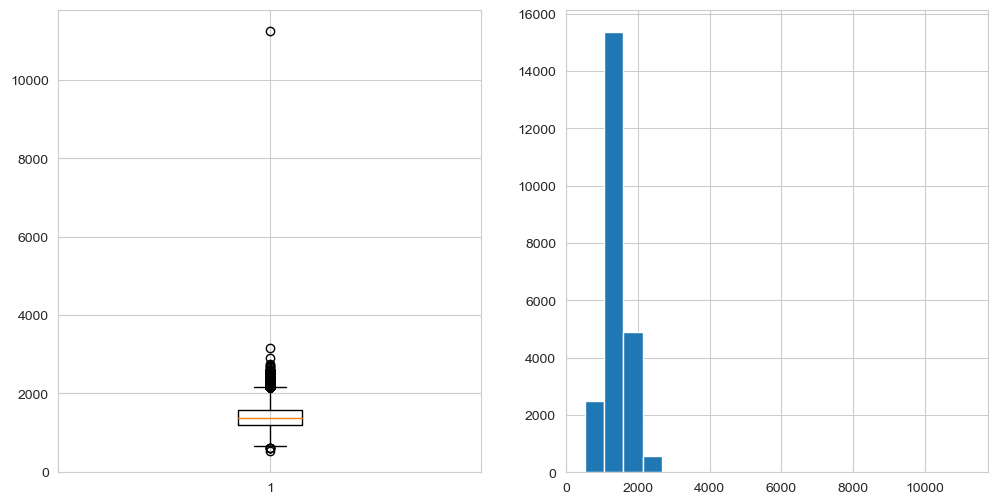

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.empty_weight)

plt.subplot(122)
plt.hist(df.empty_weight,bins=20);

In [ ]:
limits(df,"empty_weight")

Lower Limit: 627.0
Upper limit: 2155.0


In [ ]:
outliers(df,"empty_weight")

534

In [ ]:
# Gruppieren Sie nach 'make_model' und berechnen Sie den Durchschnitt der 'empty_weight' für jede Gruppe
grouped_df = df.groupby('make_model', as_index=False)['empty_weight'].mean()

# Behalten Sie nur die Zeilen, in denen der Durchschnitt der 'empty_weight' größer als 630 oder kleiner als 2300 ist
df_filtered = grouped_df[(grouped_df['empty_weight'] < 630) | (grouped_df['empty_weight'] > 2300)]
df_filtered

,make_model,empty_weight
9,Fiat 126,617.500
57,Ford Explorer,2466.000
58,Ford F 150,2530.000
79,Ford Ranger Raptor,2585.000
102,Hyundai H-1,2330.500
111,Hyundai STARIA,2478.000
208,Mercedes-Benz EQC 400,2495.000
210,Mercedes-Benz EQS,2551.667
214,Mercedes-Benz G 350,2590.375
215,Mercedes-Benz G 400,2465.750


In [ ]:
df.iloc[527]


Unnamed: 0.1                                         593
Unnamed: 0                                         18220
make_model                           Toyota Land Cruiser
make                                              Toyota
location                                              ES
price                                          66000.000
body_type                              Off-Road/Pick-up 
type                                     Pre-registered 
doors                                              5.000
warranty                                             Yes
mileage                                            3.000
gearbox                                        Automatic
fuel_type                                         Diesel
seller                                            Dealer
seats                                              7.000
power_(kw)                                       150.000
engine_size                                     2755.000
gears                          

In [ ]:
# ok

extras (§extras)

In [ ]:
df.extras.value_counts(dropna=False)

Alloy wheels                                                                                                                                                                                4171
Alloy wheels, Sport seats                                                                                                                                                                    317
Roof rack                                                                                                                                                                                    288
Alloy wheels, Roof rack                                                                                                                                                                      286
Alloy wheels, Touch screen                                                                                                                                                                   253
                                   

In [ ]:
# Packages: comfort_&_convenience_Package (§comfort_&_convenience_Package), safety_&_security_Package (§safety_&_security_Package), entertainment_&_media_Package (§entertainment_&_media_Package)

In [ ]:
df["comfort_&_convenience_Package"].value_counts()

Standard        15357
Premium          7769
Premium Plus      163
Name: comfort_&_convenience_Package, dtype: int64

In [ ]:
df["safety_&_security_Package"].value_counts()

Safety Standard Package        14013
Safety Premium Package          5797
Safety Premium Plus Package     3479
Name: safety_&_security_Package, dtype: int64

In [ ]:
df["entertainment_&_media_Package"].value_counts()

Standard Media    13632
Premium Media      9657
Name: entertainment_&_media_Package, dtype: int64

In [ ]:
# no good breeding ground for outlier investigation;-) keep it as it is

full_service_history (§full_service_history)

In [ ]:
df.full_service_history.value_counts()

0.000    12068
1.000    11221
Name: full_service_history, dtype: int64

emission_class (§emission_class)

In [ ]:
df.emission_class.value_counts()

Euro 6    18779
Euro 5     2223
Euro 4     1495
Euro 3      445
Euro 2      192
Euro 1      155
Name: emission_class, dtype: int64

In [ ]:
# ok

upholstery (§upholstery)

In [ ]:
df.upholstery.value_counts()

Cloth                12197
Part/Full Leather    11092
Name: upholstery, dtype: int64

In [ ]:
# ok

fuel_cons_comb (§fuel_cons_comb)

In [ ]:
df.fuel_cons_comb.describe()

count   23289.000
mean        5.743
std         2.862
min         0.000
25%         4.400
50%         5.300
75%         6.700
max        99.900
Name: fuel_cons_comb, dtype: float64

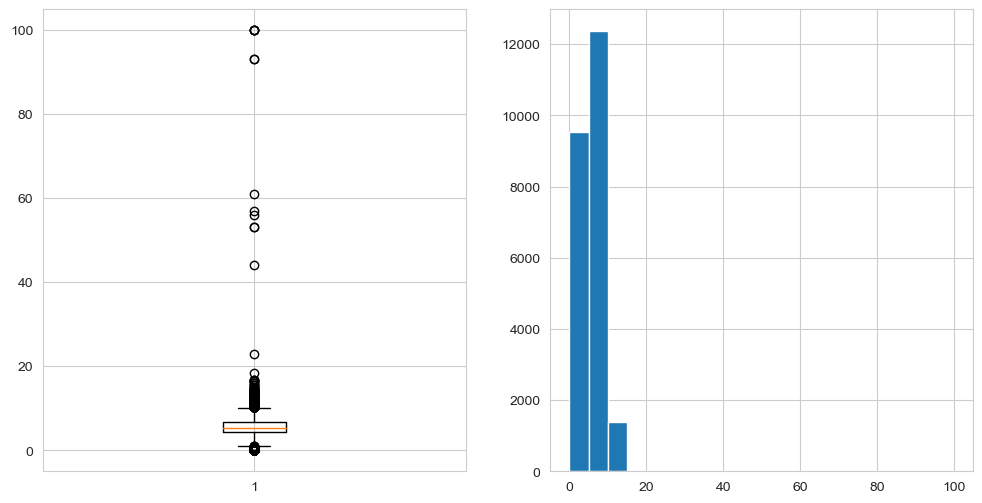

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.fuel_cons_comb)

plt.subplot(122)
plt.hist(df.fuel_cons_comb,bins=20);

In [ ]:

limits(df,"fuel_cons_comb")

Lower Limit: 0.9500000000000006
Upper limit: 10.15


In [ ]:
outliers(df,"fuel_cons_comb")

1931

In [ ]:
winsorize_percentage_selection(df,"fuel_cons_comb")

90% quantile:    8.6
92.5% quantile:  9.4
95% quantile:    10.5
97.5% quantile:  12.0
99% quantile:    12.5
99.9% quantile:  15.571200000000317


In [ ]:
df_filtered = df[(df['fuel_cons_comb'] > 15) & (df['engine_size'] < 1000)]


In [ ]:
df_filtered

,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
1798,1992,18970,Toyota Yaris,Toyota,DE,17490.000,Sedan,Used,5.000,Yes,15.000,Manual,Benzine,Dealer,5.000,53.000,998.000,5.000,Front,3.000,Catalytic Converter,1100.000,0.000,Euro 6,Cloth,0.000,56.000,1.000,Premium,Premium Media,Safety Premium Plus Package
4237,4636,24834,Hyundai KONA,Hyundai,DE,22999.000,Off-Road/Pick-up,Pre-registered,5.000,No,150.000,Manual,Benzine,Dealer,5.000,88.000,998.000,6.000,Front,3.000,"Alloy wheels, Touch screen, Voice Control",1233.000,0.000,Euro 6,Cloth,1.000,53.000,1.000,Premium,Premium Media,Safety Standard Package
4960,5394,24660,Hyundai KONA,Hyundai,DE,22999.000,Off-Road/Pick-up,Demonstration,5.000,No,2500.000,Manual,Benzine,Dealer,5.000,88.000,998.000,6.000,Front,3.000,"Alloy wheels, Touch screen, Voice Control",1233.000,0.000,Euro 6,Cloth,1.000,53.000,2.000,Premium,Premium Media,Safety Standard Package


In [ ]:
df = df.drop([1798, 4237, 4960], axis=0)


In [ ]:
from scipy.stats.mstats import winsorize

# Define the upper limit for winsorization
upper_limit = 12.5

# Apply winsorization to 'fuel_cons_comb' column
df['fuel_cons_comb'] = df['fuel_cons_comb'].apply(lambda x: min(x, upper_limit) if not pd.isnull(x) else np.nan)


In [ ]:
df_sorted = df.sort_values(by='fuel_cons_comb', ascending=True)
top_50 = df_sorted.head(50)
top_50


,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
2863,3134,6254,Renault Arkana,Renault,IT,29913.000,Off-Road/Pick-up,Used,5.000,Yes,5333.000,Automatic,Benzine,Dealer,5.000,103.000,1333.000,7.000,Front,4.000,"Alloy wheels, Emergency tyre, Shift paddles",1411.000,0.000,Euro 6,Part/Full Leather,1.000,0.000,1.000,Standard,Standard Media,Safety Standard Package
7364,7903,7543,Peugeot 308,Peugeot,FR,18499.000,Compact,Used,5.000,Yes,56133.000,Manual,Diesel,Dealer,5.000,97.000,1499.000,6.000,Front,4.000,Alloy wheels,1343.000,0.000,Euro 6,Part/Full Leather,3.000,0.000,1.000,Standard,Standard Media,Safety Premium Package
4087,4473,23391,Ford Puma,Ford,DE,24980.000,Sedan,Used,5.000,Yes,23632.000,Manual,Benzine,Dealer,5.000,114.000,999.000,6.000,Front,3.000,"Alloy wheels (19""), Ambient lighting, Automati...",1280.000,1.000,Euro 6,Part/Full Leather,1.000,0.000,1.000,Premium,Premium Media,Safety Premium Package
4090,4476,18517,Toyota Corolla,Toyota,DE,25490.000,Station wagon,Used,5.000,Yes,20000.000,Automatic,Benzine,Dealer,5.000,90.000,1798.000,1.000,Front,4.000,"Alloy wheels, Automatically dimming interior m...",1315.000,1.000,Euro 6,Cloth,1.000,0.000,1.000,Premium,Premium Media,Safety Premium Package
7322,7860,7536,Peugeot 308,Peugeot,FR,17999.000,Compact,Used,5.000,Yes,40601.000,Manual,Diesel,Dealer,5.000,76.000,1499.000,6.000,Front,4.000,Alloy wheels,1343.000,0.000,Euro 6,Part/Full Leather,3.000,0.000,1.000,Standard,Standard Media,Safety Premium Package
1918,2119,4692,Opel Insignia,Opel,DE,46990.000,Sedan,Employee's car,5.000,Yes,11000.000,Automatic,Benzine,Dealer,5.000,169.000,1998.000,9.000,4WD,4.000,"Alloy wheels, Ambient lighting, Automatically ...",1725.000,1.000,Euro 6,Part/Full Leather,0.000,0.000,1.000,Premium,Premium Media,Safety Premium Package
16478,17358,5643,Renault Megane,Renault,AT,11990.000,Coupe,Used,3.000,No,66021.000,Manual,Benzine,Dealer,5.000,85.000,1198.000,6.000,Front,4.000,Alloy wheels,1387.000,0.000,Euro 6,Cloth,7.000,0.000,2.000,Standard,Premium Media,Safety Standard Package
2541,2785,13797,Skoda Scala,Skoda,ES,18190.000,Compact,Pre-registered,5.000,Yes,5000.000,Manual,Benzine,Dealer,5.000,81.000,999.000,6.000,Front,3.000,Alloy wheels,1314.000,0.000,Euro 6,Cloth,0.000,0.000,1.000,Standard,Standard Media,Safety Standard Package
4129,4519,9648,Fiat 500,Fiat,ES,14190.000,Compact,Used,3.000,Yes,11681.000,Manual,Benzine,Dealer,4.000,52.000,999.000,6.000,Front,3.000,Alloy wheels,1055.000,0.000,Euro 6,Part/Full Leather,1.000,0.000,1.000,Standard,Standard Media,Safety Standard Package
7285,7823,189,Mercedes-Benz A 180,Mercedes-Benz,FR,23190.000,Compact,Used,5.000,No,25919.000,Automatic,Diesel,Dealer,5.000,85.000,1500.000,7.000,Front,4.000,"Shift paddles, Summer tyres",1445.000,0.000,Euro 6,Part/Full Leather,3.000,0.000,1.000,Standard,Premium Media,Safety Standard Package


In [ ]:
df["fuel_cons_comb"].value_counts().sort_index(ascending=True)


0.000      652
0.500        1
0.600        5
0.700        6
0.800        8
0.900        3
1.000       10
1.100       26
1.200       48
1.300       15
1.400       42
1.500       96
1.600       19
1.700       50
1.800       39
1.900       50
2.000       18
2.100       26
2.200       10
2.300        5
2.400        8
2.500       10
2.600        3
2.700        1
2.800       43
2.900        8
3.000       32
3.100       18
3.200       53
3.300      118
3.400      135
3.500      153
3.600      290
3.700      468
3.800      412
3.900      358
4.000      401
4.100      572
4.200      568
4.300      581
4.400      468
4.500      641
4.600      539
4.700      700
4.800      617
4.900     1202
5.000      763
5.100      633
5.200      619
5.300      590
5.400      630
5.500      507
5.600      484
5.700      530
5.800      399
5.900      456
6.000      377
6.100      265
6.200      248
6.300      356
6.400      403
6.500      296
6.600      253
6.700      228
6.800      224
6.900      247
7.000     

In [ ]:
df.loc[df['fuel_cons_comb'] < 3, 'fuel_cons_comb'] = 3


In [ ]:
df.fuel_cons_comb.describe()

count   23286.000
mean        5.815
std         2.087
min         3.000
25%         4.400
50%         5.300
75%         6.700
max        12.500
Name: fuel_cons_comb, dtype: float64

nr_of_prev_owners (§nr_of_prev_owners )

In [ ]:
df.nr_of_prev_owners.describe()

count   23286.000
mean        1.493
std         0.898
min         1.000
25%         1.000
50%         1.000
75%         2.000
max        14.000
Name: nr_of_prev_owners, dtype: float64

In [ ]:
df[df["nr_of_prev_owners"] > 6][["nr_of_prev_owners","age"]]


,nr_of_prev_owners,age
12230,8.000,4.000
13319,8.000,5.000
13320,8.000,5.000
13321,8.000,5.000
13322,8.000,5.000
14877,9.000,6.000
16167,9.000,7.000
16168,9.000,7.000
16906,8.000,8.000
19262,8.000,11.000


In [ ]:
# ok

In [ ]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)  # || percentage of Nulls

Unnamed: 0.1                    0.000
comfort_&_convenience_Package   0.000
nr_of_prev_owners               0.000
fuel_cons_comb                  0.000
age                             0.000
upholstery                      0.000
emission_class                  0.000
full_service_history            0.000
empty_weight                    0.000
extras                          0.000
cylinders                       0.000
drivetrain                      0.000
gears                           0.000
engine_size                     0.000
entertainment_&_media_Package   0.000
power_(kw)                      0.000
seller                          0.000
fuel_type                       0.000
gearbox                         0.000
mileage                         0.000
warranty                        0.000
doors                           0.000
type                            0.000
body_type                       0.000
price                           0.000
location                        0.000
make        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23286 entries, 0 to 23299
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0.1                   23286 non-null  int64  
 1   Unnamed: 0                     23286 non-null  int64  
 2   make_model                     23286 non-null  object 
 3   make                           23286 non-null  object 
 4   location                       23286 non-null  object 
 5   price                          23286 non-null  float64
 6   body_type                      23286 non-null  object 
 7   type                           23286 non-null  object 
 8   doors                          23286 non-null  float64
 9   warranty                       23286 non-null  object 
 10  mileage                        23286 non-null  float64
 11  gearbox                        23286 non-null  object 
 12  fuel_type                      23286 non-null 

In [ ]:
print(df.iloc[:, :2])

       Unnamed: 0.1  Unnamed: 0
0                 0        7058
1                 1        9856
2                 2       19680
3                 3        6295
4                 4       11885
...             ...         ...
23295         24573       21779
23296         24575       22664
23297         24576       25488
23298         24577         683
23299         24578       17219

[23286 rows x 2 columns]


In [ ]:
df.astype(str).duplicated(keep=False).sum()

0

<AxesSubplot:>

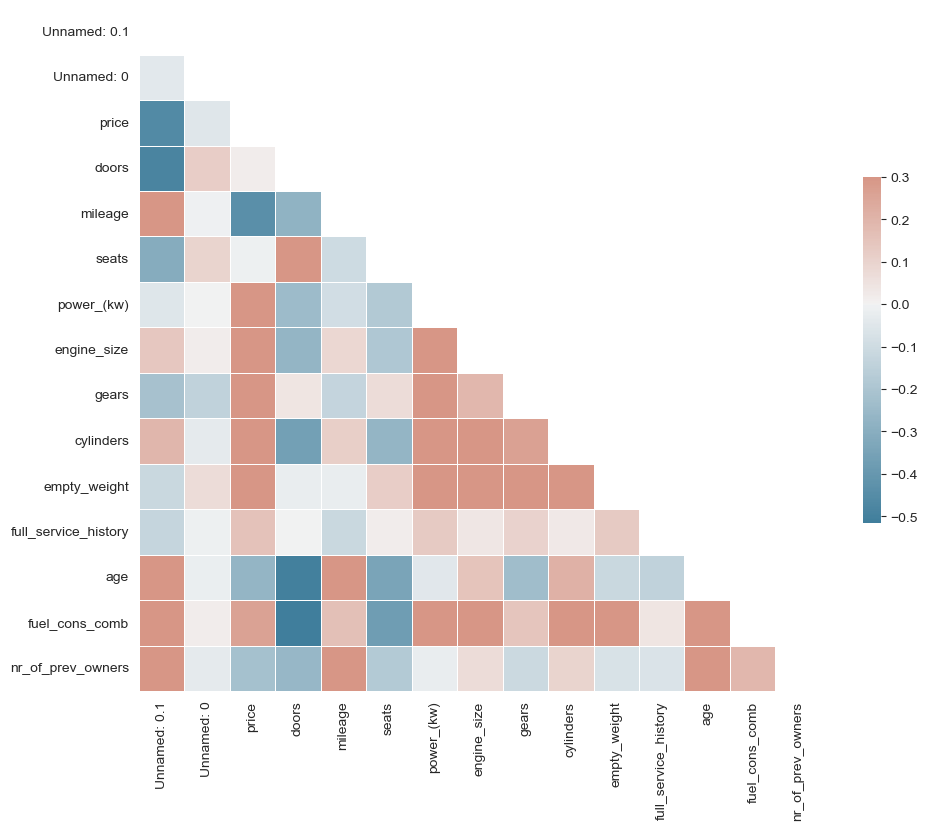

In [ ]:

# Calculate correlation matrix
corr = df.corr()

# Create a mask to ignore self-
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.describe(exclude= "object").T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,23286.000,12316.547,7006.671,0.000,6310.250,12338.500,18377.750,24578.000
Unnamed: 0,23286.000,13684.768,8273.956,1.000,6450.250,13371.500,20764.750,29478.000
price,23286.000,22813.461,17949.603,490.000,11890.000,18490.000,27990.000,109890.000
doors,23286.000,4.126,1.208,1.000,3.000,5.000,5.000,6.000
mileage,23286.000,71607.328,66247.475,0.000,19987.250,55441.000,105711.750,1300000.000
seats,23286.000,4.701,0.807,0.000,4.000,5.000,5.000,9.000
power_(kw),23286.000,119.957,69.444,13.000,80.000,100.000,135.000,924.000
engine_size,23286.000,1757.776,1090.513,0.000,1300.000,1598.000,1987.000,99900.000
gears,23286.000,5.982,1.470,0.000,5.000,6.000,6.000,10.000
cylinders,23286.000,4.058,1.016,0.000,4.000,4.000,4.000,12.000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23286 entries, 0 to 23299
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0.1                   23286 non-null  int64  
 1   Unnamed: 0                     23286 non-null  int64  
 2   make_model                     23286 non-null  object 
 3   make                           23286 non-null  object 
 4   location                       23286 non-null  object 
 5   price                          23286 non-null  float64
 6   body_type                      23286 non-null  object 
 7   type                           23286 non-null  object 
 8   doors                          23286 non-null  float64
 9   warranty                       23286 non-null  object 
 10  mileage                        23286 non-null  float64
 11  gearbox                        23286 non-null  object 
 12  fuel_type                      23286 non-null 

In [ ]:
df.shape

(23286, 31)

In [ ]:
# column 0 and 1 will not be deleted to show the audit trail

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,drivetrain,cylinders,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,0,7058,Renault Clio,Renault,FR,16990.000,Sedan,Used,5.000,No,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,67.000,999.000,5.000,Front,4.000,Alloy wheels,1157.000,0.000,Euro 6,Cloth,1.000,3.300,1.000,Premium,Premium Media,Safety Standard Package
1,1,9856,Fiat 500 Abarth,Fiat,NL,17995.000,Compact,Used,3.000,No,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,Front,4.000,"Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,3.000,6.000,2.000,Standard,Standard Media,Safety Standard Package
2,2,19680,Nissan Micra,Nissan,NL,3250.000,Convertible,Used,2.000,No,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,Front,4.000,"Alloy wheels (15"")",1125.000,0.000,Euro 6,Part/Full Leather,3.000,6.600,2.000,Standard,Standard Media,Safety Standard Package
3,3,6295,Renault Captur,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,No,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,Front,3.000,Steel wheels,1322.000,0.000,Euro 6,Cloth,0.000,5.100,1.000,Standard,Standard Media,Safety Premium Package
4,4,11885,Fiat Panda,Fiat,IT,18690.000,Sedan,Pre-registered,5.000,Yes,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,4WD,2.000,"Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,4.900,1.000,Standard,Premium Media,Safety Standard Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23295,24573,21779,Ford M,Ford,BE,20000.000,Convertible,Used,4.000,No,65515.000,Manual,Benzine,Dealer,5.000,21.000,2043.000,6.000,Front,4.000,Summer tyres,1320.000,0.000,Euro 6,Part/Full Leather,93.000,4.900,3.000,Standard,Standard Media,Safety Standard Package
23296,24575,22664,Ford Bronco,Ford,DE,57480.000,Off-Road/Pick-up,Used,5.000,No,10.000,Automatic,Benzine,Dealer,5.000,180.000,2000.000,8.000,4WD,4.000,"Touch screen, Trailer hitch, Voice Control",2146.000,0.000,Euro 6,Part/Full Leather,122.000,8.300,1.000,Standard,Premium Media,Safety Standard Package
23297,24576,25488,Hyundai IONIQ,Hyundai,DE,26991.000,Sedan,Used,5.000,No,29961.000,Automatic,Benzine,Dealer,5.000,103.000,1580.000,6.000,Front,4.000,"Alloy wheels, Shift paddles, Touch screen",1626.000,1.000,Euro 6,Cloth,122.000,3.000,1.000,Premium,Premium Media,Safety Premium Package
23298,24577,683,Mercedes-Benz E 53 AMG,Mercedes-Benz,BE,108900.000,Convertible,Demonstration,2.000,Yes,3856.000,Automatic,Benzine,Dealer,4.000,320.000,2999.000,8.000,4WD,6.000,"Alloy wheels, Ambient lighting, Automatically ...",1980.000,0.000,Euro 6,Part/Full Leather,0.000,8.800,1.000,Standard,Premium Media,Safety Premium Plus Package


In [ ]:
df.to_csv('cleaned_autoscout_part_3.csv')